#***Dog Identifier***

In [ ]:
## ! unzip "/content/drive/MyDrive/Dog Identifier/dog-breed-identification-data.zip" -d "/content/drive/MyDrive/Dog Identifier/"

In [ ]:
## import tensorflow in colab
import tensorflow as tf
import tensorflow_hub as hub


In [ ]:
## checkingout the label folder for the training data
import pandas as pd
labels_csv = pd.read_csv("/content/drive/MyDrive/Dog Identifier/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


<Axes: xlabel='breed'>

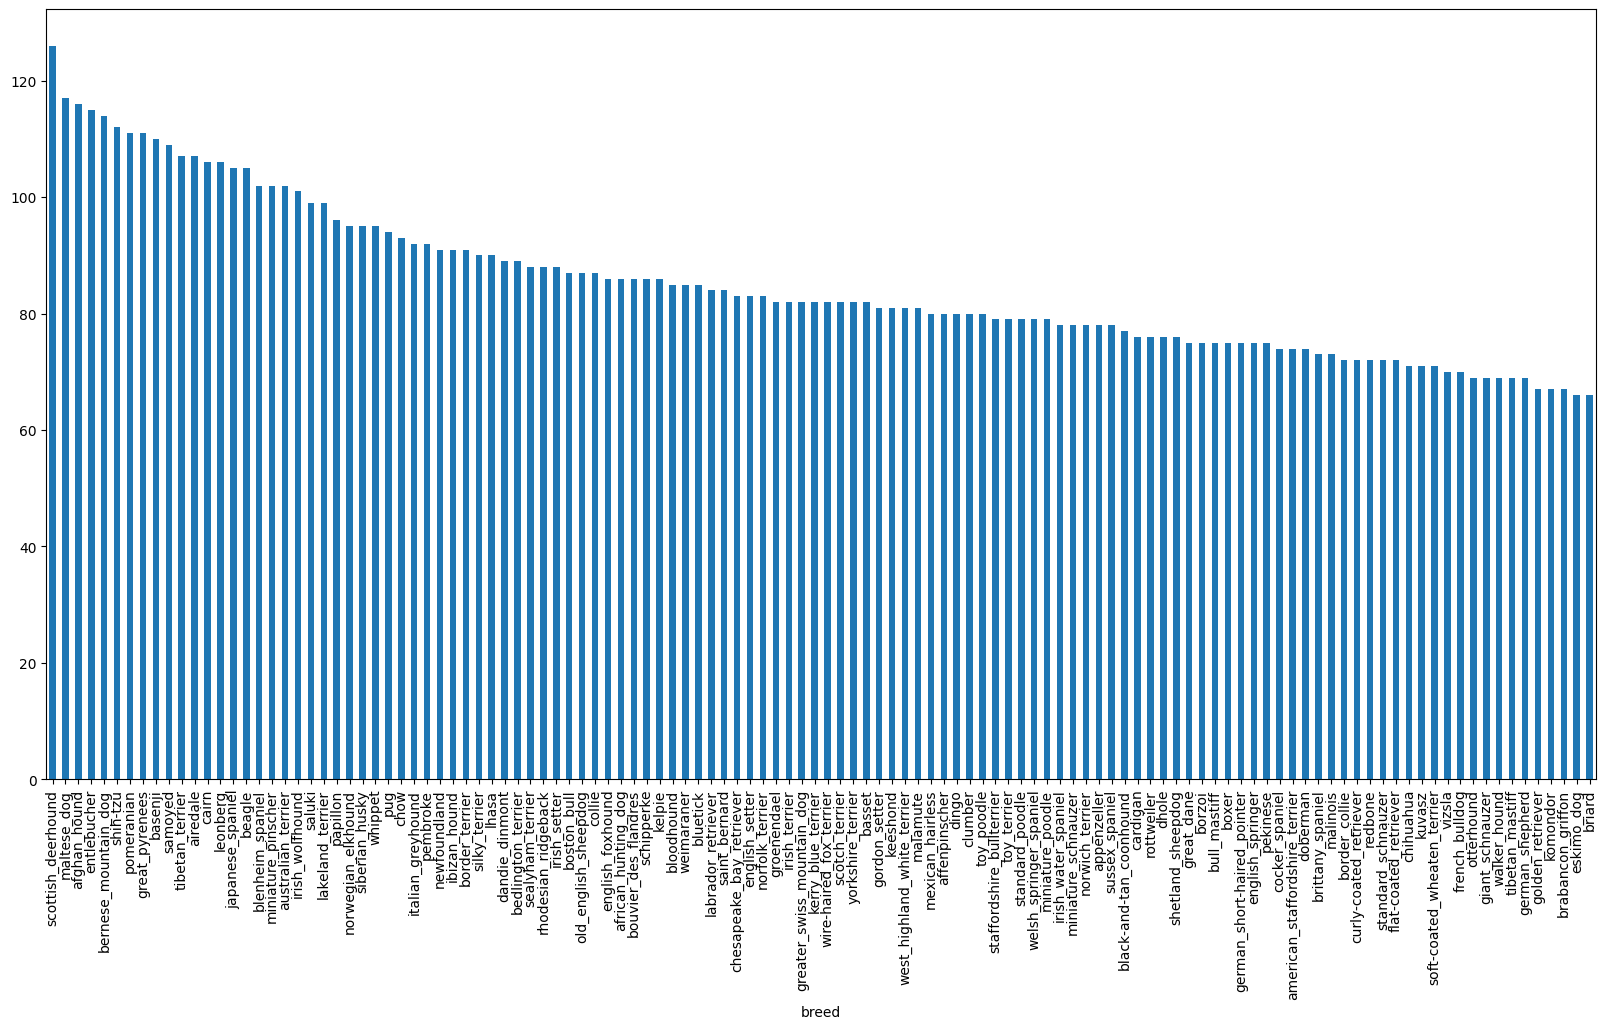

In [ ]:
## checkingout how many images are there of each breed
labels_csv['breed'].value_counts().plot.bar(figsize = (20,10))

In [ ]:
## let's see the median
labels_csv['breed'].value_counts().median()

82.0

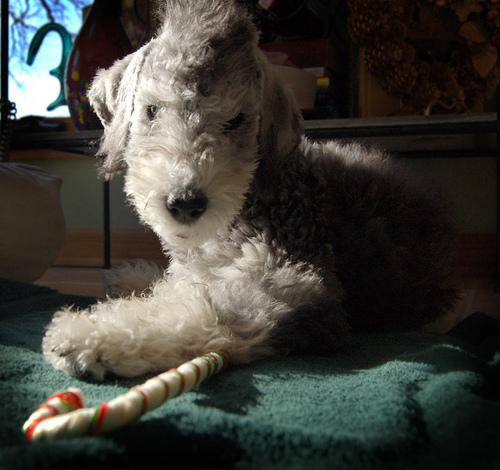

In [ ]:
# viewing an image
from IPython.display import Image
Image("/content/drive/MyDrive/Dog Identifier/train/00290d3e1fdd27226ba27a8ce248ce85.jpg")

Getting images and their labels

In [ ]:
# giving names to the images present in train folder
filenames = ['/content/drive/MyDrive/Dog Identifier/train/' + name + ".jpg" for name in labels_csv['id']]

# checking for first 5 names
filenames[:5]

['/content/drive/MyDrive/Dog Identifier/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog Identifier/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Dog Identifier/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Dog Identifier/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Dog Identifier/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

In [ ]:
## checking whether the number of filenames/labels matches the number of image files
import os
if len(os.listdir("/content/drive/MyDrive/Dog Identifier/train/")) == len(filenames):
  print("filenames matches image files")
else:
  print("filenames doesn't matches image files.. check the target directory")

filenames matches image files


rhodesian_ridgeback


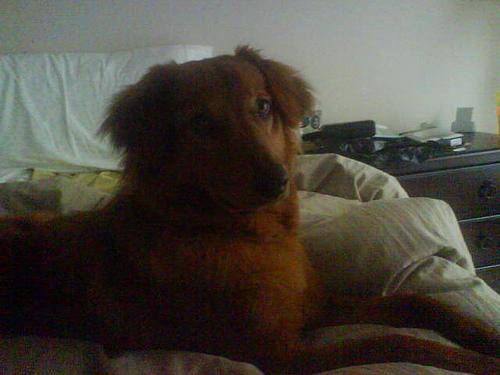

In [ ]:
## manual check
print(labels_csv['breed'][100] )
Image(filenames[1000])

In [ ]:
##
import numpy as np
labels = np.array(labels_csv['breed'])
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
if len(labels) == len(filenames):
  print("length are matching")
else:
  print("length are not matching...checka above")

length are matching


In [ ]:
unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
len(unique_breeds)

120

In [ ]:
## turning a single label to an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
## turning array back into integer
print(labels[0])    ## print the breed name at 0th position
print(np.where(labels[0] == unique_breeds))    ## index where the breed name accures
print(boolean_labels[0].argmax())    ## it's position in the boolean_labels
print(boolean_labels[0].astype(int))    ## boolean_labels's of this in integer form

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
filenames[:2]

['/content/drive/MyDrive/Dog Identifier/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Dog Identifier/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg']

#*** bold textCreating our Model***



In [ ]:
## setup X and y
X = filenames
y =  boolean_labels

In [ ]:
## starting with exparimenting with 1000 images and increasing as needed
NUM_IMAGES = 10222  #@param {type:"slider",  min:1000,  max:10222,  step:1000}

In [ ]:
## splitting data into train and test split
from  sklearn.model_selection  import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size = 0.125, random_state = 10)
len(X_train), len(X_val), len(y_train), len(y_val)

(8944, 1278, 8944, 1278)

In [ ]:
X_train[:2], y_train[:2]

(['/content/drive/MyDrive/Dog Identifier/train/fab341dadc50afc1a507a9910d5101b3.jpg',
  '/content/drive/MyDrive/Dog Identifier/train/3fef6e63d8590ca814653301855ff000.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False

# ***Preprocessing Images (turning images into Tensors )***

In [ ]:
## Converting images into Numpy array
from matplotlib.pyplot import imread
image = imread(filenames[10])
image.shape

(500, 375, 3)

In [ ]:
image.max(), image.min()

(255, 0)

array([[[110, 100, 108],
        [120, 110, 118],
        [112, 102, 110],
        ...,
        [ 75,  68,  75],
        [ 80,  73,  80],
        [ 74,  67,  74]],

       [[ 99,  89,  97],
        [112, 102, 110],
        [109,  99, 107],
        ...,
        [ 73,  66,  73],
        [ 78,  71,  78],
        [ 73,  66,  73]],

       [[ 82,  72,  80],
        [ 90,  80,  88],
        [ 84,  74,  82],
        ...,
        [ 73,  64,  69],
        [ 76,  67,  72],
        [ 72,  63,  68]],

       ...,

       [[ 27,  27,  19],
        [ 21,  21,  13],
        [ 17,  17,   9],
        ...,
        [ 39,  51,  49],
        [ 48,  60,  58],
        [ 45,  57,  55]],

       [[ 24,  21,  14],
        [ 10,   7,   0],
        [  6,   3,   0],
        ...,
        [ 25,  37,  35],
        [ 38,  50,  48],
        [ 33,  45,  43]],

       [[ 18,  15,   8],
        [ 18,  15,   8],
        [ 22,  19,  12],
        ...,
        [ 30,  42,  40],
        [ 54,  66,  64],
        [ 57,  69,  67]]], dtype=uint8)
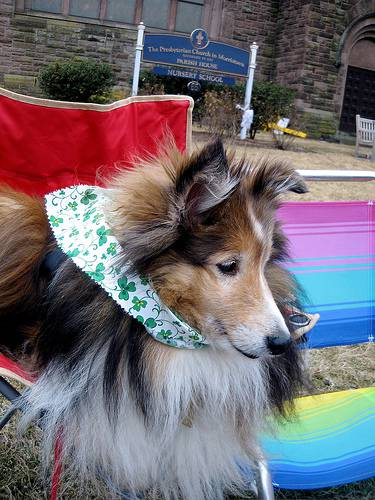

In [ ]:
image

In [ ]:
## Turning image numpy array into tensors
tf.constant(image)

<tf.Tensor: shape=(500, 375, 3), dtype=uint8, numpy=
array([[[110, 100, 108],
        [120, 110, 118],
        [112, 102, 110],
        ...,
        [ 75,  68,  75],
        [ 80,  73,  80],
        [ 74,  67,  74]],

       [[ 99,  89,  97],
        [112, 102, 110],
        [109,  99, 107],
        ...,
        [ 73,  66,  73],
        [ 78,  71,  78],
        [ 73,  66,  73]],

       [[ 82,  72,  80],
        [ 90,  80,  88],
        [ 84,  74,  82],
        ...,
        [ 73,  64,  69],
        [ 76,  67,  72],
        [ 72,  63,  68]],

       ...,

       [[ 27,  27,  19],
        [ 21,  21,  13],
        [ 17,  17,   9],
        ...,
        [ 39,  51,  49],
        [ 48,  60,  58],
        [ 45,  57,  55]],

       [[ 24,  21,  14],
        [ 10,   7,   0],
        [  6,   3,   0],
        ...,
        [ 25,  37,  35],
        [ 38,  50,  48],
        [ 33,  45,  43]],

       [[ 18,  15,   8],
        [ 18,  15,   8],
        [ 22,  19,  12],
        ...,
        [ 30,  42,  4

In [ ]:
## Making function for preprocessing all the images into tensors


## Define image size
IMG_SIZE = 224

## Creating a function
def process_image(image_path, ing_size = IMG_SIZE):
  """
  takes the image file path and convert it into tensors
  """

  # Read in a  Image file
  image = tf.io.read_file(image_path)

  ## Turning images into numerical tensors with 3 color channels
  image = tf.image.decode_jpeg(image, channels = 3)

  ## Converting the color channel values from 0-255 to 0-1
  image = tf.image.convert_image_dtype(image, tf.float32)

  ## Resizing the image into to dersired size i.e (224, 224)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

# ***Turning data into Batches***

In [ ]:
## Creating a simple function for to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  take the image file path name and the associated label,
  processes the image and return the tuple (image, label).
  """
  image = process_image(image_path)
  return image , label

In [ ]:
## trying above function
get_image_label(X[10], y[10])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.41753423, 0.38224012, 0.40184796],
         [0.4316044 , 0.39631027, 0.4159181 ],
         [0.40602714, 0.37879497, 0.3957155 ],
         ...,
         [0.19028023, 0.17067239, 0.18635866],
         [0.28062278, 0.26101494, 0.2767012 ],
         [0.28965282, 0.27004498, 0.28573126]],
 
        [[0.36733648, 0.33204237, 0.3516502 ],
         [0.3150591 , 0.27976498, 0.29937282],
         [0.29561085, 0.26837867, 0.2852992 ],
         ...,
         [0.23583163, 0.21230222, 0.22014536],
         [0.2812507 , 0.25772128, 0.2655644 ],
         [0.26320195, 0.23967254, 0.24751568]],
 
        [[0.40703085, 0.3717367 , 0.3907143 ],
         [0.46396694, 0.42867282, 0.4476504 ],
         [0.5020599 , 0.47482777, 0.491118  ],
         ...,
         [0.27574417, 0.24076518, 0.24374136],
         [0.30945447, 0.27447549, 0.27745166],
         [0.25501153, 0.22003253, 0.22300872]],
 
        ...,
 
        [[0.26359692, 0.28712633

In [ ]:
## Making function for turning all the data into batches

# Define batch size
BATCH_SIZE = 32

## Creating the function
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of images from (X) and labes (y) pairs.
  Shuffles the data if it's training data but not if it's validation data.
  Also acceptes test data as input.
  """

  # if the data is test dataset
  if test_data:

    print("Creating test dataset batches")

    # turning filepath and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) ## only filepaths

    #Creating batches with preprocessed image
    data_batches = data.map(process_image).batch(BATCH_SIZE)
    return data_batches

  ## if the data is validation dataset
  elif valid_data:
    print("Creating valid dataset batches")

    # turning filepath and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))  ## filepaths + labels

    # Creating tuples (image,labels) (this also turning image paths into preprocessed images)
    data_batches = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batches


  else:
    print("Creating train dataset batches")

    # turning filepath and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), tf.constant(y)))  ## filepaths + labels

    # Shuffling filepath names and labels before mapping  image process function is faster than shuffling images
    data = data.shuffle(buffer_size = len(X))

    # Creating tuples (image,labels) (this also turning image paths into preprocessed images)
    data_batches = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batches

In [ ]:
## Creating training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data= True)

Creating train dataset batches
Creating valid dataset batches


In [ ]:
## Checking different attributes of the data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

# Visualising Data Batches

In [ ]:
 import matplotlib.pyplot as plt

 # Creating the function for viewing the images form the batches
 def show_25_images(images, labels):
  """
  Display a plot of 25 images from the batch
  """

  ## setup figure
  plt.figure(figsize=(10,10))

  ## loop through 25 for displaying 25 images
  for i in range(25):
    # creating the subplot
    ax = plt.subplot(5, 5, i+1)
    #display images
    plt.imshow(images[i])
    #add the labels
    plt.title(unique_breeds[labels[i].argmax()])
    #turning off the grid line
    plt.axis("off")
    plt.tight_layout(h_pad = 2.0)


In [ ]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

<ipython-input-35-0d69c455cc9c>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(5, 5, i+1)


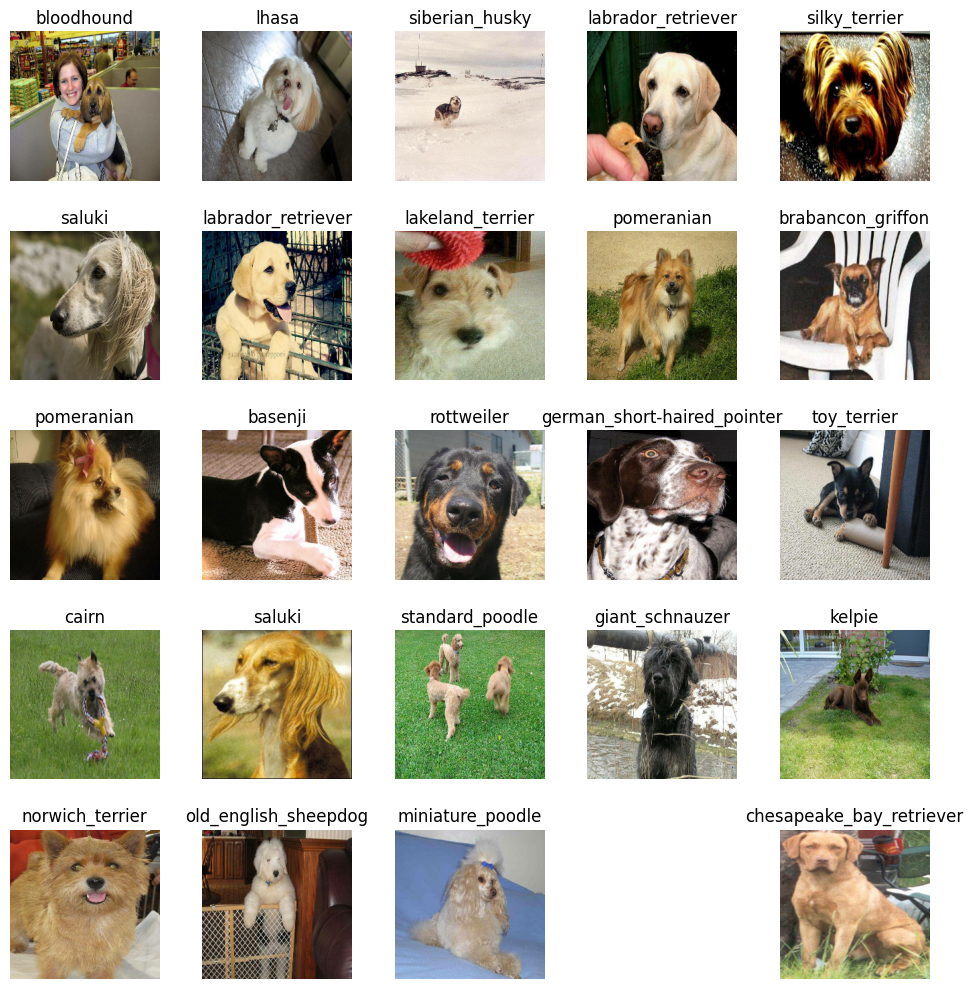

In [ ]:
## now visualize the data
train_image, train_label = next(train_data.as_numpy_iterator())
show_25_images(train_image, train_label)

<ipython-input-35-0d69c455cc9c>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(5, 5, i+1)


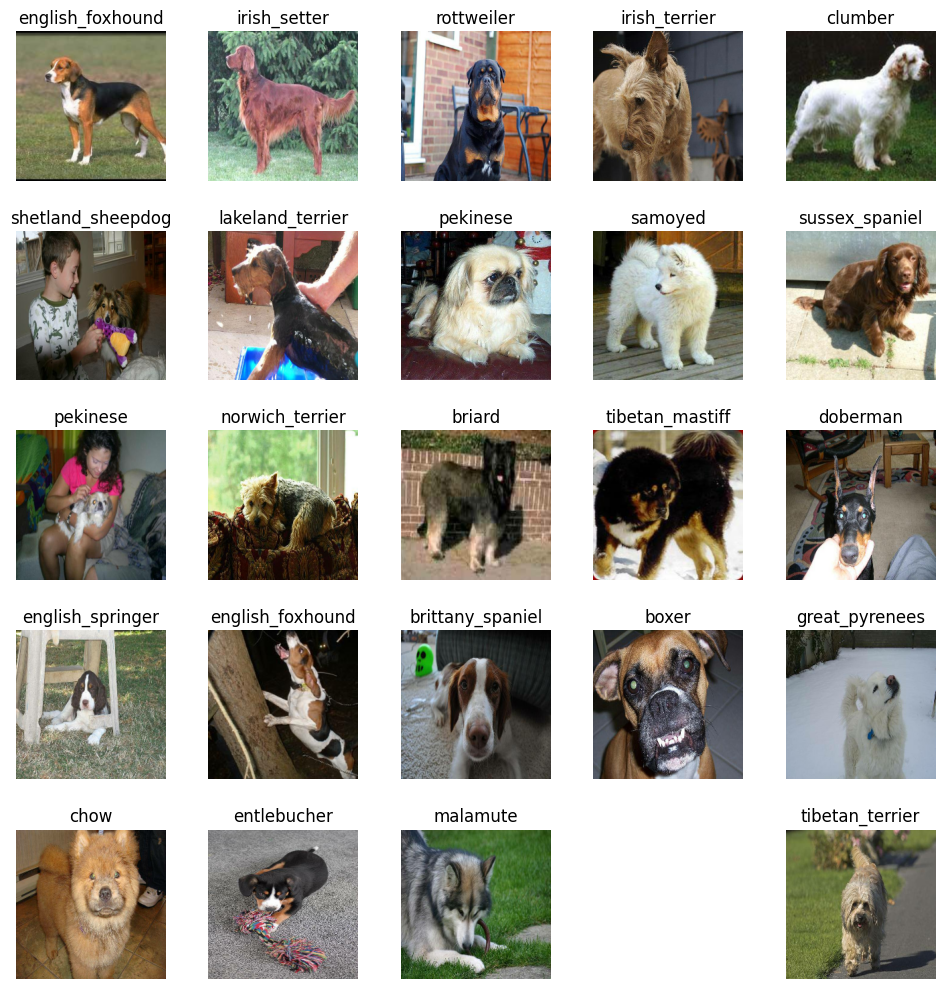

In [ ]:
## visualizing the val data
val_image, val_label = next(val_data.as_numpy_iterator())
show_25_images(val_image, val_label)

# ***Building the Model***



In [ ]:
IMG_SIZE

224

In [ ]:
#setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3]  ## batch, height, width, color channels

# setup the output shape of the model
OUTPUT_SHAPE = len(unique_breeds)

# setup model URL from TensorflowHub
URL = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-224-classification/2"

In [ ]:
INPUT_SHAPE

[None, 224, 224, 3]

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


## Creating the model
def create_model(input_shape=INPUT_SHAPE ,output_shape=OUTPUT_SHAPE ,model_url=URL):
  print("creating model using:", URL)

  # Setup model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(URL), ## Layer 1 (URL layers)
      tf.keras.layers.Dense(units = 5 * OUTPUT_SHAPE, activation = "relu"),  ## Layer 2
      Dropout(0.5),
      tf.keras.layers.Dense(units = OUTPUT_SHAPE, activation = "softmax") ## Layer 3 output layer
  ])

  ## compiling the model
  model.compile(loss = tf.keras.losses.CategoricalCrossentropy(), optimizer = "adam", metrics =['accuracy'] )

  ## Building the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

creating model using: https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-224-classification/2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              1692489   
                                                                 
 dense (Dense)               (None, 600)               601200    
                                                                 
 dropout (Dropout)           (None, 600)               0         
                                                                 
 dense_1 (Dense)             (None, 120)               72120     
                                                                 
Total params: 2365809 (9.02 MB)
Trainable params: 673320 (2.57 MB)
Non-trainable params: 1692489 (6.46 MB)
_________________________________________________________________


# ***Creating a CallBack function***

In [ ]:
## Load Tensorboard notebook extention
%load_ext tensorboard

In [ ]:
import datetime

## Creating the function for tensorboard callback
def create_tensorboard_callback():
  # Creating a log directory for storing Tensorboard logs
  logdir = os.path.join("/content/drive/MyDrive/Dog Identifier/logs", datetime.datetime.now().strftime("%Y%M%D-%H%M%S"))  ##making it so the logs get tracked whenever we ran an experiment
  return tf.keras.callbacks.TensorBoard(logdir)

# ***Early Stopping CallBack***

In [ ]:
## creating early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy", patience = 10, restore_best_weights = True)

# ***Training a Model***

In [ ]:
NUM_EPOCHS = 100#@param {type:"slider", min:10, max:100, step:10}

In [ ]:
# Bulid a function to train the model and returned a trained model
def train_model():
  """
  Trains the given model and return a trained version
  """

  ##create a model
  model = create_model()

  ## create a new tensorboard session every time we train the model
  tensorboard = create_tensorboard_callback()

  ## Fit the model to the data passing it the callbacks we created
  model.fit(x =train_data, epochs=NUM_EPOCHS, validation_data = val_data, validation_freq = 1, callbacks = [tensorboard, early_stopping])

  #Return the fitted model
  return model

In [ ]:
## fit the model to the data
model = train_model()

creating model using: https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/035-224-classification/2
Epoch 1/100
280/280 [==============================] - 344s 1s/step - loss: 2.7753 - accuracy: 0.3475 - val_loss: 1.6038 - val_accuracy: 0.5540
Epoch 2/100
280/280 [==============================] - 44s 155ms/step - loss: 1.6811 - accuracy: 0.5468 - val_loss: 1.5383 - val_accuracy: 0.5657
Epoch 3/100
280/280 [==============================] - 46s 163ms/step - loss: 1.3474 - accuracy: 0.6156 - val_loss: 1.5263 - val_accuracy: 0.5900
Epoch 4/100
280/280 [==============================] - 44s 157ms/step - loss: 1.1416 - accuracy: 0.6667 - val_loss: 1.4981 - val_accuracy: 0.6064
Epoch 5/100
280/280 [==============================] - 43s 154ms/step - loss: 0.9877 - accuracy: 0.7046 - val_loss: 1.5649 - val_accuracy: 0.5908
Epoch 6/100
280/280 [==============================] - 43s 154ms/step - loss: 0.8739 - accuracy: 0.7323 - val_loss: 1.5824 - val_accuracy: 0.6088
Epoch 7/100
280/2

In [ ]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("/content/drive/MyDrive/Dog Identifier/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
# Save our model trained on All images
save_model(model, suffix="images-mobilenetv2-Adam")

Saving model to: /content/drive/MyDrive/Dog Identifier/models/20240518-14501716043847-images-mobilenetv2-Adam.h5...


'/content/drive/MyDrive/Dog Identifier/models/20240518-14501716043847-images-mobilenetv2-Adam.h5'